In [1]:
### take1 
# import data

# Added by Wenhong to test github
# added by Brett to test github
# added by Ashwin to test github

In [2]:
#0.  Setup
# Numpy for working with Arrays
import numpy as np
# Pandas for working with data tables
import pandas as pd
# SciPy implements many different numerical algorithms
import scipy as sp
import scipy.stats as stats
# Module for plotting
import matplotlib
import matplotlib.pyplot as plt
# Module for linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf


C:\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


---

## Part 1: Descriptive analysis

In [3]:
#load data from csv file
water_values = pd.read_csv('train_set_values.csv')
water_labels = pd.read_csv('train_set_labels.csv')


#examine data structures
print water_values.shape
#print train_values.dtypes
print water_labels.shape

#preview data
water_values.head()
water_labels.head()

(59400, 40)
(59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
### merge values and labels
water = pd.merge(water_values, water_labels, on='id')
print water.shape
water.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
water.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [6]:
water_summary = water.describe(include='all')
water_summary
water[['extraction_type', 'extraction_type_group', 'extraction_type_class']].head().describe()
water[water.extraction_type != water.extraction_type_class].count()

id                       21426
amount_tsh               21426
date_recorded            21426
funder                   20642
gps_height               21426
installer                20623
longitude                21426
latitude                 21426
wpt_name                 21426
num_private              21426
basin                    21426
subvillage               21306
region                   21426
region_code              21426
district_code            21426
lga                      21426
ward                     21426
population               21426
public_meeting           20021
recorded_by              21426
scheme_management        19382
scheme_name               5058
permit                   20616
construction_year        21426
extraction_type          21426
extraction_type_group    21426
extraction_type_class    21426
management               21426
management_group         21426
payment                  21426
payment_type             21426
water_quality            21426
quality_

In [7]:
water['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

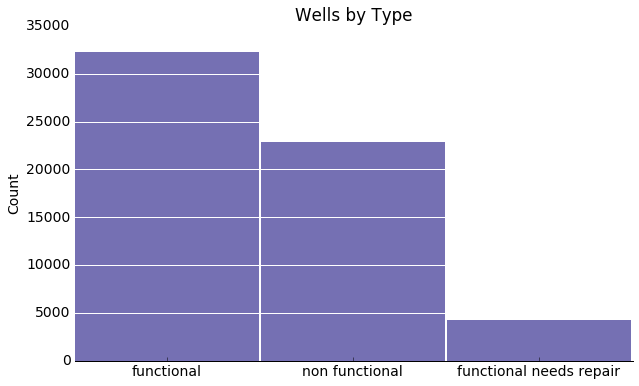

In [114]:
%matplotlib inline 

# set some nicer defaults for matplotlib (from: Raza Khan, INFX 574 University of Washington, 2016)
from matplotlib import rcParams

# Some code below to produce pretty graphs
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 30)

# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

# make function to remove borders/ticks
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()


# make df to hold Status_group counts
label_counts = pd.DataFrame(water.status_group.value_counts())

# set plot parameters
ind = np.arange(label_counts.index.size)
width = .99

# create plot
plt.bar(ind, label_counts.values, width = width, color = dark2_colors[2])

# add labels
plt.gca().set_ylabel('Count')
plt.gca().set_title('Wells by Type')
plt.xticks(ind + width/2., label_counts.index)

# define style
def histogram_style():
    remove_border(left=False)
    plt.grid(False)
    plt.grid(axis='y', color='w', linestyle='-', lw=1)
    
histogram_style()

In [9]:
# make df to hold Status_group counts
label_counts = pd.DataFrame(water.status_group.value_counts())

# set plot parameters
label_counts.values


array([[32259],
       [22824],
       [ 4317]], dtype=int64)

In [10]:
#naming conventions after splitting DD's train set into train and validation sets
#water_train # thinking 80%
#water_validate #thinking 20%
#water_test #in final step, DD's test dataset

In [11]:
# check datatypes
water.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [29]:
# set date_recorded to date/time
water['date_recorded'] = pd.to_datetime(water['date_recorded'])

# set all categorical values to category: based on having fewer than 50 unique values
### commenting out for time being - can uncomment if we decide to use 'category' instead of 'object' for these features
'''
for c in water:
    if water[c].dtypes == 'O':
        if len(water[c].unique()) < 50:
            water[c] = water[c].astype('category')
            
'''

"\nfor c in water:\n    if water[c].dtypes == 'O':\n        if len(water[c].unique()) < 50:\n            water[c] = water[c].astype('category')\n            \n"

In [12]:
# Min/Max/Mean/SD/percentiles for integer and float features
water.describe().T


,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [93]:
# create df of only categorical data (type = 'object') for making histograms below
obj_columns = pd.DataFrame()

# only include object type columns with between 2 and 50 unique values (exclude ones with 
# too many categories because histogram becomes useless)
for c in water:
    if water[c].dtypes == 'O':
        if (len(water[c].unique()) > 1) and (len(water[c].unique())) < 50:
            obj_columns[c] = water[c]

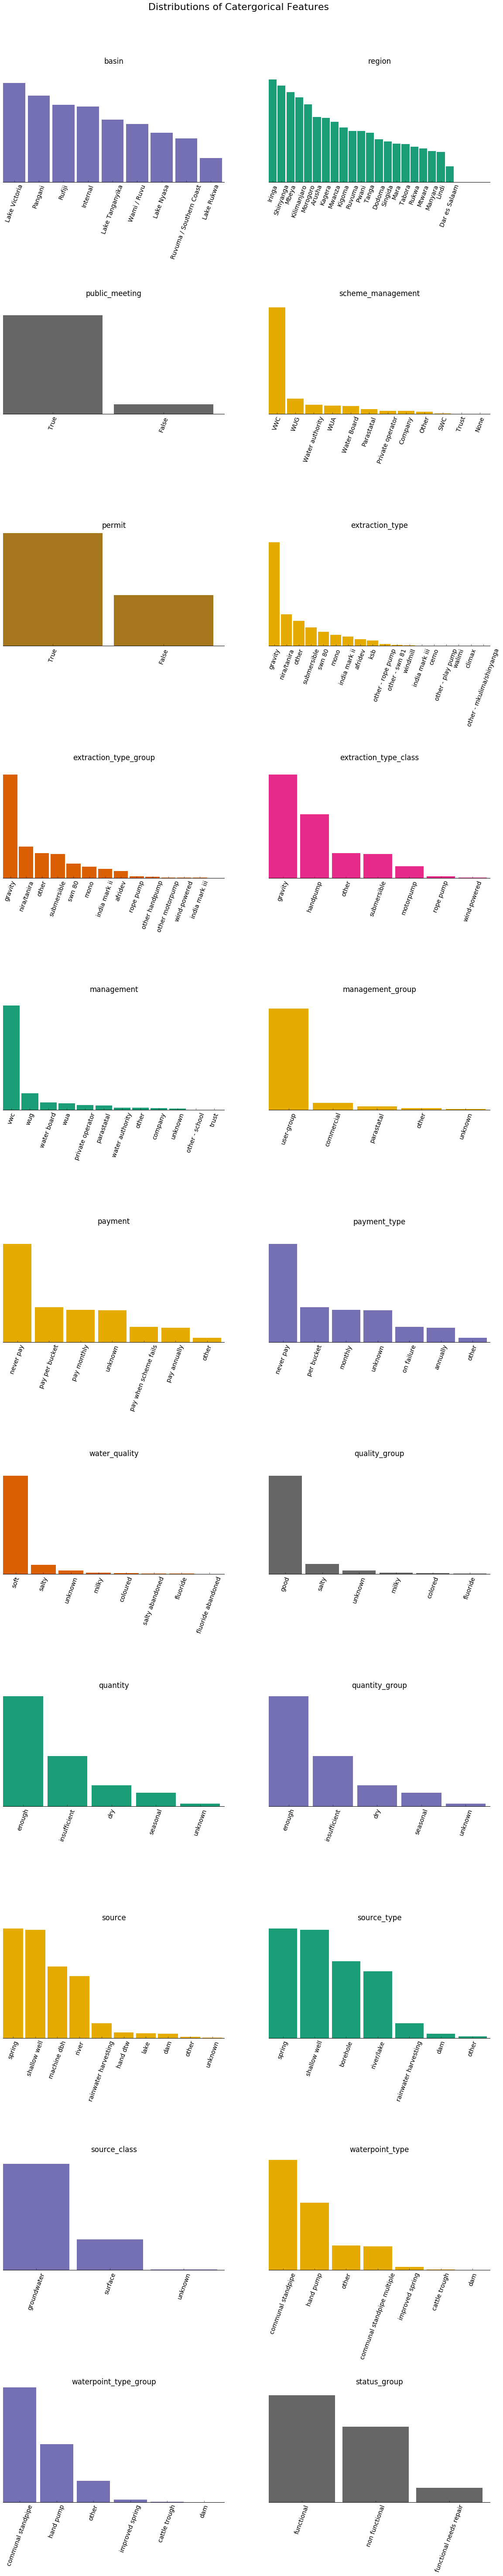

In [171]:
from random import randint

# set up figure with 22 subplots
fig, axs = plt.subplots(11,2, figsize=(20,100))
axs = axs.ravel()

# set spacing between subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

# give title
fig.suptitle('Distributions of Catergorical Features', fontsize=22, y=.92)

# define style function
def sub_histogram_style(axs):
    remove_border(left=False, axes = axs) # pass subplot object 'axs'
    axs.grid(False)
    axs.grid(axis='y', color='w', linestyle='-', lw=1)

# initialize counter
i = 0
# iterate for loop to create each subplot out of column from obj_columns df
for c in obj_columns:

    # make df to hold Status_group counts
    feature_count = pd.DataFrame(water[c].value_counts())

    # set plot parameters
    ind = np.arange(feature_count.index.size)
    width = .9

    # create plot
    axs[i].bar(ind, feature_count.values, width = width, color = dark2_colors[randint(0,7)])
    axs[i].set_title(c) # title
    plt.sca(axs[i]) # apply next command to specific plot (sca must be used for plt.xticks to work)
    plt.xticks(ind + width/2., feature_count.index, rotation = 70) # x axis labels, rotated
    axs[i].get_yaxis().set_visible(False) # remove y axis
    
    sub_histogram_style(axs[i]) # apply style function to subplot
    i += 1

